Name: Alya Shamila binti Zuki

Matric Number: BI21110082


# KD04403 Natural Language Processing - Sentiment Analysis

# --------- IMDB Movie Ratings Sentiment Analysis ---------

In [23]:
# Loading necessary libraries
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Loading the dataset from the CSV file
df = pd.read_csv("c:/Users/alyas/OneDrive - ums.edu.my/Documents/UMS/Semester 7/KD04403 NLP/archive (1)/movie.csv")

# Displaying dataset overview
# Dataset Description
print("Dataset Shape: ", df.shape)
print("\nColumns: ", df.columns)
print("\nClass Distribution:")

# Adding a review column for easier interpretation.
# The values 1 - positive and 0 - negative
df["review"] = df["label"].map({1: "positive", 0: "negative"})

# Displaying class distribution as percentages.
distribution_percentage = print(df['review'].value_counts(normalize=True)*100)

Dataset Shape:  (40000, 2)

Columns:  Index(['text', 'label'], dtype='object')

Class Distribution:
review
negative    50.0475
positive    49.9525
Name: proportion, dtype: float64


# ---- Dataset Details ----

Source: Kaggle's IMDB Movie Ratings Sentiment Analysis dataset (https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis)

Size: The dataset has 40,000 rows and 2 columns:
1. 'text': The text of the movie review.
2. 'label': The label for the review (0 - negative, 1 - positive).
3. 'review': Same as label but in 'Negative' or 'Positive' instead of binary labels.

Structure:
1. Text Data: Contains raw movie reviews as text.
2. Label Data: Contains the sentiment labels for the reviews (0 - negative, 1 - positive).

Distribution:
1. 0 - Negative: 20,019 (50.05%)
2. 1 - Positive: 19,981 (49.95%)

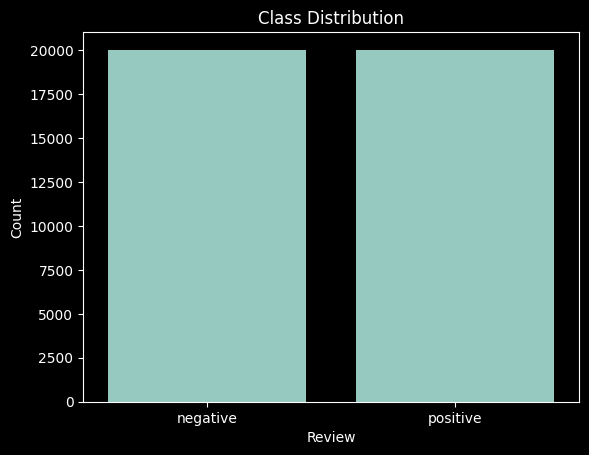

In [ ]:
# Visualizing the class distribution.
sns.countplot(x='review', data=df)
plt.title("Class Distribution")
plt.xlabel("Review")
plt.ylabel("Count")
plt.show()


# ---- Exploratory Data Analysis (EDA) ----

In [7]:
# Displaying initial snippets of the dataset.
print("Snippets of the data: ")
print(df.head())

# Displaying dataset information, and missing values
print("\nInformation of the data: ")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Snippets of the data: 
                                                text  label    review
0  I grew up (b. 1965) watching and loving the Th...      0  negative
1  When I put this movie in my DVD player, and sa...      0  negative
2  Why do people who do not know what a particula...      0  negative
3  Even though I have great interest in Biblical ...      0  negative
4  Im a die hard Dads Army fan and nothing will e...      1  positive

Information of the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
 2   review  40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None

Missing Values:
text      0
label     0
review    0
dtype: int64


# Positive Reviews (Before Text Cleaning)

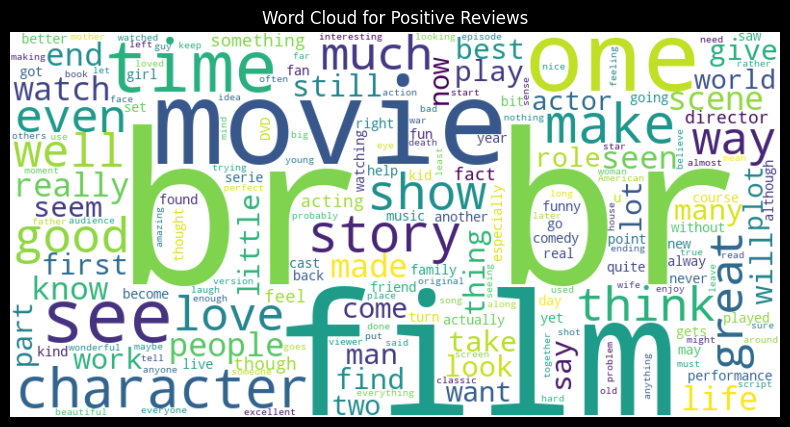

In [8]:
# Generate Word Cloud for Positive Reviews
positive = " ".join(df[df['review'] == "positive"]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Negative Reviews (Before Text Cleaning)

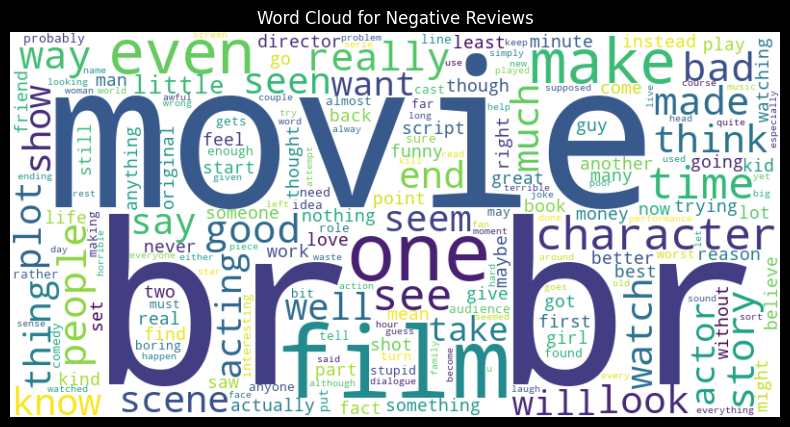

In [9]:
# Generate Word Cloud for Negative Reviews
negative = " ".join(df[df['review'] == "negative"]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

# Text Cleaning

In [5]:
# Displaying summary after text cleaning.
print("\nSnapshot before text cleaning:")
print(df["text"].head())


Snapshot before text cleaning:
0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
4    Im a die hard Dads Army fan and nothing will e...
Name: text, dtype: object


In [6]:
# Text preprocessing function
# Removal of HTML tags/entities, non-aphabetic characters, stopwords, and lemmatization
stop_words = set(stopwords.words("english"))
custom = {'movie', 'film', 'character', 'one', 'even', 'story', 'see', 
        'show', 'scene', 'time', 'good', 'made', 'make', 'think', 'really', 'well',
        'way', 'seem', 'life', 'thing', 'people', 'first', 'much', 'know', 'look', 'go', 'know',
        'actor', 'plot', 'end', 'say'}

all_stopwords = stop_words.union(custom)

lemmatizer = WordNetLemmatizer()

def clean(text):
    # Remove all HTML tags (e.g., <br/>, <div>, <p>, etc.)
    text = re.sub(r'<.*?>', '', text)
    
    # Remove HTML entities like &nbsp; or other encoded characters
    text = re.sub(r'&[a-z]+', '', text)
    
    # removing everything except alphabets
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # removing whitespaces
    text = " ".join(text.split())
    
    # convert text to lowercase
    text = text.lower()
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # remove stopwords
    tokens = [word for word in tokens if word not in all_stopwords]
    
    # lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    clean_text = " ".join(tokens)
    return clean_text

# Apply text cleaning to the 'text' column.
df["text"] = df["text"].apply(lambda x: clean(x))

In [7]:
# Displaying summary after text cleaning.
print("\nSnapshot after text cleaning:")
print(df["text"].head())


Snapshot after text cleaning:
0    grew b watching loving thunderbird mate school...
1    put dvd player sat coke chip expectation hopin...
2    particular past like feel need try define othe...
3    though great interest biblical movie bored dea...
4    im die hard dad army fan nothing ever change g...
Name: text, dtype: object


# Positive Reviews (After Text Cleaning)

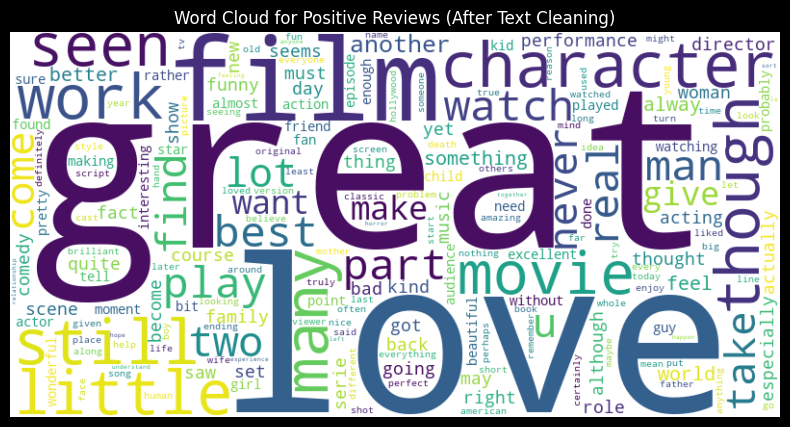

In [ ]:
# Generate Word Cloud for Positive Reviews after text cleaning
positive_clean = " ".join(df[df['review'] == "positive"]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews (After Text Cleaning)")
plt.show()

# Negative Reviews (After Text Cleaning)

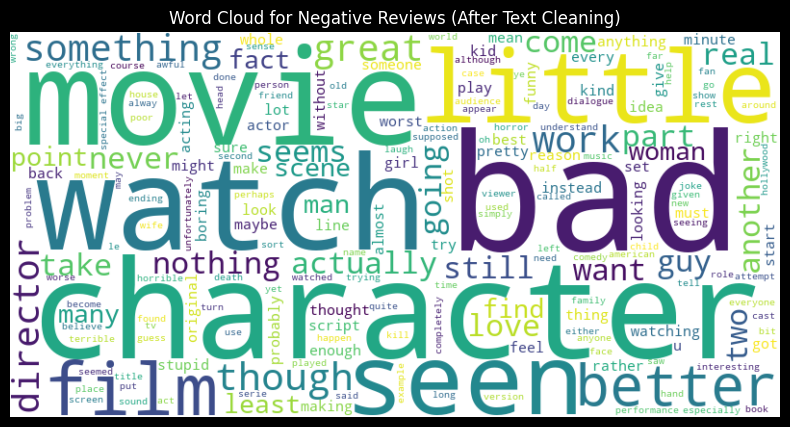

In [ ]:
# Generate Word Cloud for Negative Reviews after text cleaning
negative_clean = " ".join(df[df['review'] == "negative"]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews (After Text Cleaning)")
plt.show()

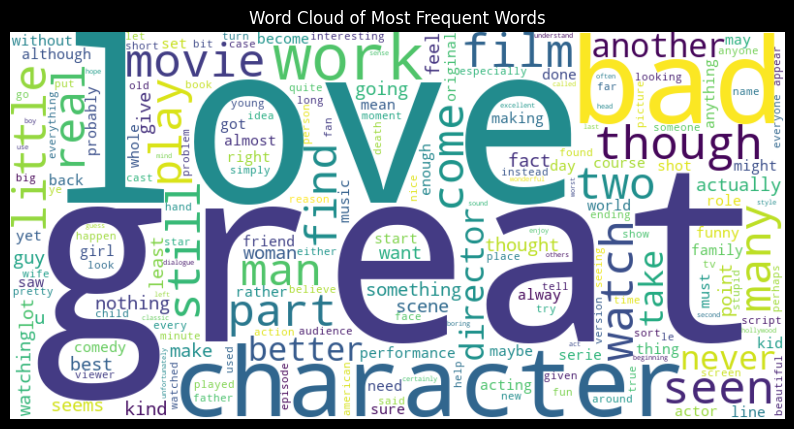

In [27]:
# Generate Word Cloud for Most Frequent Words after text cleaning
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# ---- Feature Extraction ----
1. TF-IDF
2. Word2Vec
3. GloVe

In [10]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5500)
X_tfidf = tfidf.fit_transform(df['text'])

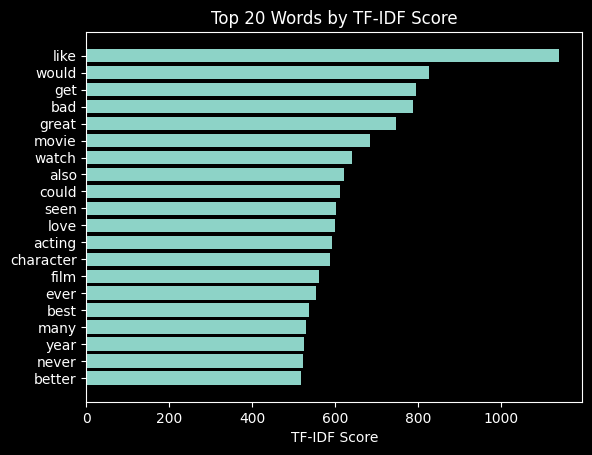

In [28]:
# Visualize top words by TF-IDF score
tfidf_scores = np.array(X_tfidf.sum(axis=0)).flatten()
top_indices = tfidf_scores.argsort()[-20:][::-1]
top_words = [tfidf.get_feature_names_out()[i] for i in top_indices]
plt.barh(top_words[::-1], tfidf_scores[top_indices][::-1])
plt.title('Top 20 Words by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.show()

In [11]:
# Word2Vec Model
# Tokenize the text data
tokens = df["text"].apply(lambda x: x.split())

# Train Word2Vec
word2vec_model = Word2Vec(sentences=tokens, vector_size=300, window=5, min_count=1, workers=4)

def get_word2vec_embeddings(text):
    tokens = text.split()
    # Use word2vec_model.wv to access the word vectors
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)  # Average the embeddings
    else:
        return np.zeros(300)  # Handle empty cases (300 is the embedding size)

X_word2vec = np.vstack(df["text"].apply(get_word2vec_embeddings))

In [12]:
def load_glove_embeddings(file_path):
    glove_dict = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype="float32")
            glove_dict[word] = vector
    return glove_dict

# Path to the GloVe embeddings file
glove_file_path = "C:/Users/alyas/OneDrive - ums.edu.my/Documents/UMS/Semester 7/KD04403 NLP/glove.6B/glove.6B.300d.txt"

# Load the GloVe model
glove_model = load_glove_embeddings(glove_file_path)

# GloVe Embeddings
def get_glove_embeddings(text):
    tokens = text.split()
    embeddings = [glove_model[word] for word in tokens if word in glove_model]
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)  # Average the embeddings
    else:
        return np.zeros(300)  # Handle empty cases

X_glove = np.vstack(df["text"].apply(get_glove_embeddings))

In [13]:
# Dimensionality Reduction for Word2Vec and GloVe
pca = PCA(n_components=50)
X_word2vec_reduced = pca.fit_transform(X_word2vec)
X_glove_reduced = pca.fit_transform(X_glove)

In [14]:
# Standardization
scaler = StandardScaler()
X_dense_combined = np.hstack([X_word2vec_reduced, X_glove_reduced])
X_dense_combined_scaled = scaler.fit_transform(X_dense_combined)


In [15]:
# Combine All Features for model training
X_combined = hstack([X_tfidf, csr_matrix(X_dense_combined_scaled)])

print("TF-IDF Feature Shape:", X_tfidf.shape)
print("Word2Vec Reduced Shape:", X_word2vec_reduced.shape)
print("GloVe Reduced Shape:", X_glove_reduced.shape)
print("Combined Feature Matrix Shape:", X_combined.shape)

TF-IDF Feature Shape: (40000, 5500)
Word2Vec Reduced Shape: (40000, 50)
GloVe Reduced Shape: (40000, 50)
Combined Feature Matrix Shape: (40000, 5600)


In [18]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['label'], test_size=0.2, random_state=42)

# ---- Model Training ----
1. Logistic Regression
2. Random Forest
3. Naive Bayes

In [19]:
# Model Training and Evaluation Function

def train_and_evaluate(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Print the classification report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

In [20]:
# Train and Evaluate Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
train_and_evaluate(logistic_regression, "Logistic Regression")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3966
           1       0.89      0.89      0.89      4034

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



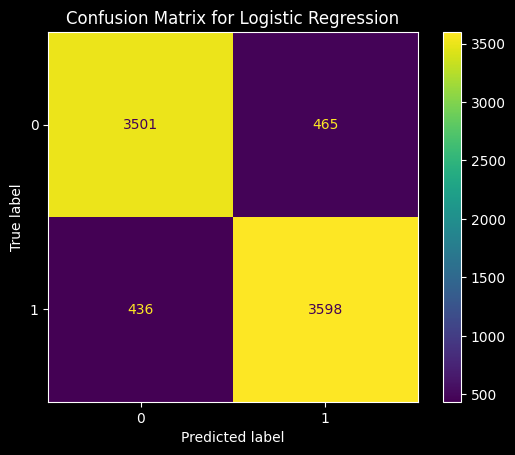

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [21]:
# Train and Evaluate Random Forest
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
train_and_evaluate(random_forest, "Random Forest")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3966
           1       0.85      0.87      0.86      4034

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



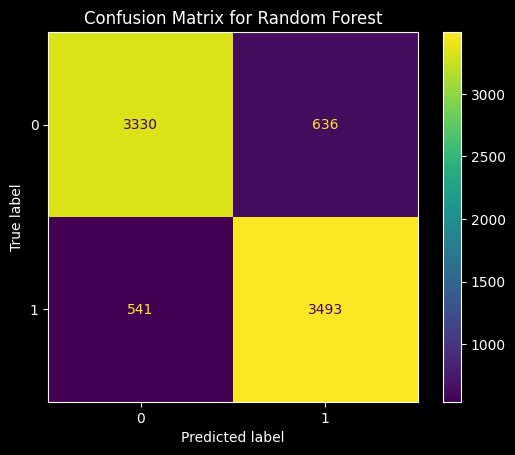

In [30]:
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [34]:
# Convert sparse matrix to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Train Gaussian Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_dense, y_train)
y_pred = naive_bayes.predict(X_test_dense)

# Evaluate the model
print(f"\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3966
           1       0.81      0.77      0.79      4034

    accuracy                           0.79      8000
   macro avg       0.80      0.79      0.79      8000
weighted avg       0.80      0.79      0.79      8000



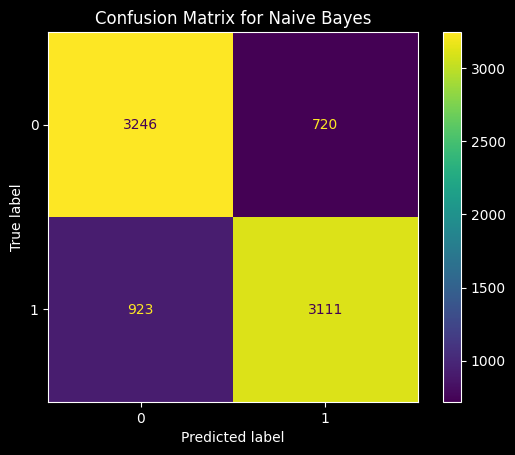

In [32]:
ConfusionMatrixDisplay.from_estimator(naive_bayes, X_test_dense, y_test)
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# ----- Model Evaluation and Comparison -----

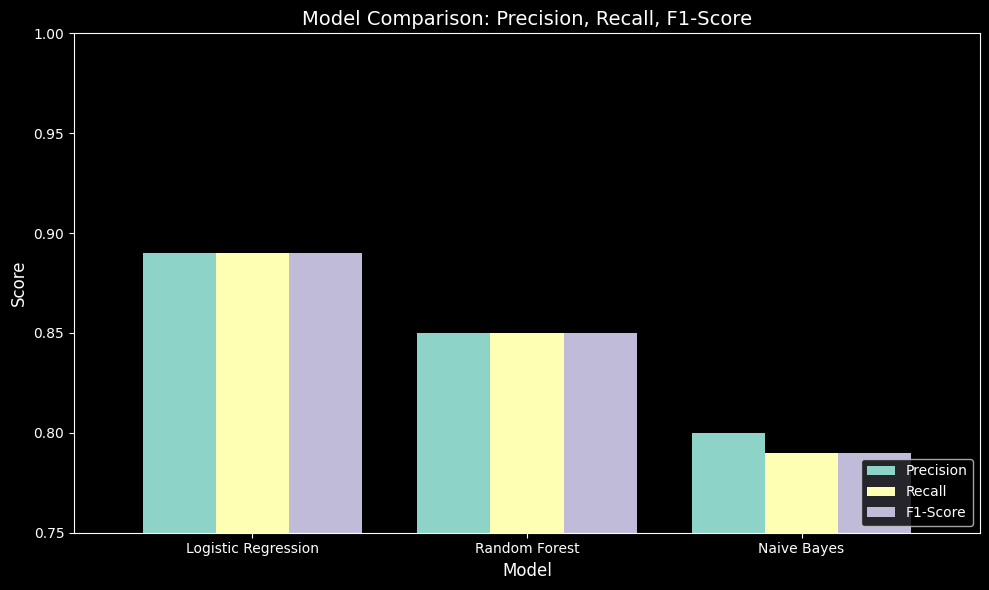

In [40]:
# Model Comparison
metrics = {
    "Model": ["Logistic Regression", "Random Forest", "Naive Bayes"],
    "Precision": [0.89, 0.85, 0.80],  # Weighted Avg Precision from reports
    "Recall": [0.89, 0.85, 0.79],     # Weighted Avg Recall from reports
    "F1-Score": [0.89, 0.85, 0.79]    # Weighted Avg F1-Score from reports
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot metrics
metrics_df.plot(x="Model", kind="bar", figsize=(10, 6), rot=0, width=0.8)
plt.title("Model Comparison: Precision, Recall, F1-Score", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0.75, 1.0)  # Adjust y-axis for better visualization
plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

In [41]:
print(metrics_df)

                 Model  Precision  Recall  F1-Score
0  Logistic Regression       0.89    0.89      0.89
1        Random Forest       0.85    0.85      0.85
2          Naive Bayes       0.80    0.79      0.79


Model Performance Tables:
Above is a table summarizing the performance of the models using the weighted average F1-Score along with other evaluation metrics such as precision, and recall based on the classification reports.


Strengths and Weaknesses:

1. Logistic Regression:
    - Strengths: 
        - Easy to implement and interpret yet efficient in training. 
        - Very efficient when the dataset has features that are linearly separable. 
        - Outputs well-calibrated probabilities along with classification results.
    - Weaknesses: 
        - Can't solve non-linear problems. 
        - Assumes linearity between dependent and independent variables. 
        - Unable to capture complex relationships.

2. Random Forest:
    - Strengths: 
        - Handles both numerical and categorical data. 
        - Performs well even without data processing such as imputation or outlier removal.
        - Robustness to noise, resilient to noisy data.
    - Weaknesses: 
        - Computationally more expensive especially for large datasets.
        - Can take longer to make predictions than certain other algorithms.
        - Prone to overfitting when it captures noise in the training data.

3. Naive Bayes:
    - Strengths: 
        - Simple and efficient for smaller datasets. 
        - Performs reasonably well with text data and probabilistic classification.
        - It is not sensitive to irrelevant features.
    - Weaknesses: 
        - Assumes independence between features, which is unrealistic for most text data and in real life. 
        - Assigns zero probability to a categorical variable to a categorical variable whose category in the test data wasn't available in the training dataset.

Observations:

1. Logistic Regression emerged as the best-performing model, with the highest weighted F1-Score of 89%.
2. Random Forest followed close with an F1-Score of 85% but lagged in terms of efficiency and resource usage.
3. Naive Bayes, while efficient, struggled with the feature dependencies inherent in text data, resulting in comparatively lower performance.

# ---- Conclusion ----

Key Insights: 

1. Dataset Composition:
    - The dataset consists of 40,000 rows and 2 columns.
    - Columns:
        a. 'text': Contains raw movie reviews in textual format.
        b. 'label' or 'review': Contains binary labels (0 - Negative or 1 - Positive).

2. Class Distribution:
    - The Dataset is almost perfectly balanced:
        - Negative Sentiments: 20,019 (50.05%)
        - Positive Sentiments: 19,981 (49.95%)
    - This balanced data eliminates the need to use any data balancing techniques such as SMOTE, under-sampling, or over-sampling.

3. Data Quality:
    - The dataset has no missing values, which is essential in guaranteeing the robustness of the training process and make it easier to process the data without having the need to eliminate any missing values firsthand.

4. Model Performance:
    -Logistic Regression emerged as the best model based on the weighted average F1-Score (0.89), showcasing its ability to generalize well for this task.
    -Random Forest followed with an F1-Score of 0.85, while Naive Bayes scored 0.79, indicating relatively lower performance due to assumptions about data distribution.


Suggestions for Improvement:

1. Advanced Feature Engineering:
    - Experiment with different text representation techniques:
        - Transformer-based embeddings (e.g., BERT, RoBERTa) for capturing context of the sentences.

2. Further Evaluation:
    - Add additional evaluation metrics, such as AUC-ROC or log loss, for a deeper understanding of the model's discriminative power.

3. Scalability:
    - Test the models on larger or real-world datasets to assess scalability and adaptability.

